In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Import csv data and drop null
all_data = pd.read_csv('All_USA_Data.csv')
all_data = all_data.dropna()

In [3]:
#Grab specific columns
all_clean_data = all_data[['FIPS','State','County','Lat', 'Long_','Total Population','Per Capita Income', 'Confirmed', 'Deaths', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS' ]]
all_clean_data.head()


,FIPS,State,County,Lat,Long_,Total Population,Per Capita Income,Confirmed,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,28151,Mississippi,Washington,33.283920,-90.941962,47086.0,19884.0,2104.0,70.0,0.138,0.084,0.164,0.114,0.500
1,28111,Mississippi,Perry,31.171619,-88.992818,12028.0,21611.0,370.0,14.0,0.057,0.056,0.110,0.273,0.503
2,28019,Mississippi,Choctaw,33.345982,-89.248094,8321.0,20589.0,168.0,5.0,0.035,0.094,0.064,0.219,0.588
3,28057,Mississippi,Itawamba,34.279935,-88.360673,23480.0,20629.0,669.0,18.0,0.116,0.074,0.155,0.191,0.464
4,28015,Mississippi,Carroll,33.448346,-89.919945,10129.0,22567.0,302.0,12.0,0.080,0.144,0.119,0.120,0.537


[[1.         0.77386712]
 [0.77386712 1.        ]]


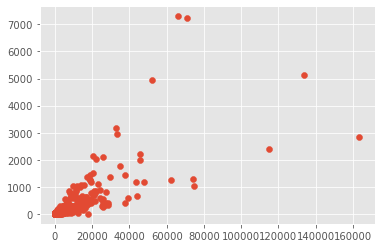

In [15]:
#all clean data corrcoeff of deaths and confirmed cases
print(np.corrcoef(all_clean_data['Confirmed'], all_clean_data['Deaths']))
matplotlib.style.use('ggplot')

plt.scatter(all_clean_data['Confirmed'], all_clean_data['Deaths'])
plt.show()

In [4]:
total_pop = all_clean_data["Total Population"].sum()
avg_income = all_clean_data["Per Capita Income"].mean()
confirmed = all_clean_data["Confirmed"].sum()
deaths= all_clean_data["Deaths"].sum()
never = all_clean_data["NEVER"].mean()
rarely = all_clean_data["RARELY"].mean()
sometimes = all_clean_data["SOMETIMES"].mean()
frequently = all_clean_data["FREQUENTLY"].mean()
always = all_clean_data["ALWAYS"].mean()


In [5]:
all_data = pd.DataFrame({
    "Total Population":[total_pop],
    "Per Capita Income": [avg_income],
    "Confirmed" :[confirmed],
    "Deaths": [deaths],
    "NEVER": [never],
    "RARELY": [rarely],
    "SOMETIMES": [sometimes],
    "FREQUENTLY": [frequently],
    "ALWAYS": [always]
})
all_data['State'] = 'USA'
all_data

,Total Population,Per Capita Income,Confirmed,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,State
0,258184000.0,26990.145878,5053770.0,160870.0,0.081882,0.084565,0.122762,0.206092,0.504694,USA


In [6]:
#Group by state and run .agg() on specific columns
grouped_states_data = all_clean_data.groupby(['State']).agg({'Total Population':['sum'],
                                                             'Per Capita Income':['mean'],
                                                             'Confirmed':['sum'],
                                                             'Deaths': ['sum'],
                                                             'NEVER':['mean'],
                                                             'RARELY':['mean'],
                                                             'SOMETIMES':['mean'],
                                                             'FREQUENTLY':['mean'],
                                                             'ALWAYS':['mean'],
                                                            })
grouped_states_data.columns = grouped_states_data.columns.droplevel(1)
grouped_states_data = grouped_states_data.reset_index()
grouped_states_data.head()

,State,Total Population,Per Capita Income,Confirmed,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,Delaware,949495.0,32643.333333,18098.0,613.0,0.019333,0.006667,0.060667,0.095667,0.817667
1,District of Columbia,684498.0,53321.000000,14493.0,616.0,0.012000,0.013000,0.069000,0.164000,0.743000
2,Florida,20598139.0,26438.432836,657354.0,12502.0,0.055254,0.057522,0.110343,0.194299,0.582552
3,Georgia,10297484.0,23416.930818,271816.0,6100.0,0.083333,0.078377,0.126145,0.199792,0.512314
4,Hawaii,1421954.0,32480.250000,10433.0,95.0,0.013750,0.020250,0.033750,0.125750,0.806250


In [7]:
midwest_states = ['Missouri', 'Illinois', 'Indiana', 'Ohio', 'Michigan']
midwest_data = grouped_states_data.loc[grouped_states_data['State'].isin(midwest_states)]

midwest_data = midwest_data.rename({'State':'Location'})
midwest_data

,State,Total Population,Per Capita Income,Confirmed,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
6,Illinois,12821497.0,28297.509804,257738.0,8273.0,0.072275,0.071314,0.126873,0.219490,0.510078
7,Indiana,6637426.0,26846.782609,103505.0,3196.0,0.086098,0.096435,0.130424,0.236924,0.450217
15,Michigan,9957488.0,26889.590361,116322.0,6822.0,0.044795,0.061265,0.100289,0.218880,0.574807
18,Missouri,6090062.0,23987.200000,90242.0,1624.0,0.134061,0.127165,0.151652,0.210539,0.376557
28,Ohio,11641879.0,27505.068182,135326.0,4403.0,0.091455,0.101705,0.150273,0.217682,0.438852


In [8]:
illinois_df = midwest_data.loc[midwest_data['State']=='Illinois']
missouri_df = midwest_data.loc[midwest_data['State']=='Missouri']
indiana_df = midwest_data.loc[midwest_data['State']=='Indiana']
michigan_df = midwest_data.loc[midwest_data['State']=='Michigan']
ohio_df = midwest_data.loc[midwest_data['State']=='Ohio']

In [9]:
all_data = all_data.append(midwest_data)

In [10]:
all_data = all_data[['State','Total Population', 'Per Capita Income', 'Confirmed', 'Deaths', 'NEVER',
       'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']]
all_data

,State,Total Population,Per Capita Income,Confirmed,Deaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,USA,258184000.0,26990.145878,5053770.0,160870.0,0.081882,0.084565,0.122762,0.206092,0.504694
6,Illinois,12821497.0,28297.509804,257738.0,8273.0,0.072275,0.071314,0.126873,0.219490,0.510078
7,Indiana,6637426.0,26846.782609,103505.0,3196.0,0.086098,0.096435,0.130424,0.236924,0.450217
15,Michigan,9957488.0,26889.590361,116322.0,6822.0,0.044795,0.061265,0.100289,0.218880,0.574807
18,Missouri,6090062.0,23987.200000,90242.0,1624.0,0.134061,0.127165,0.151652,0.210539,0.376557
28,Ohio,11641879.0,27505.068182,135326.0,4403.0,0.091455,0.101705,0.150273,0.217682,0.438852


In [11]:
all_data = all_data.rename(columns= {'NEVER':'NEVER_0%',
       'RARELY':'RARELY_25%', 'SOMETIMES':'SOMETIMES_50%', 'FREQUENTLY':'FREQUENTLY_75%', 'ALWAYS':'ALWAYS_100%'})
all_data['NEVER_0%'] = 0
all_data['RARELY_25%'] = all_data['RARELY_25%'] * .25
all_data['SOMETIMES_50%'] = all_data['SOMETIMES_50%'] * .50
all_data['FREQUENTLY_75%'] = all_data['FREQUENTLY_75%'] * .75
all_data['ALWAYS_100%'] = all_data['ALWAYS_100%'] * 1
all_data['Likely to wear mask'] = (all_data['RARELY_25%'] + all_data['SOMETIMES_50%']+ all_data['FREQUENTLY_75%']+all_data['ALWAYS_100%'])
all_data['Likely to wear mask'] = pd.Series(["{0:.2f}%".format(val * 100) for val in all_data['Likely to wear mask']], index = all_data.index)
comparitive_data = all_data[['State', 'Total Population','Per Capita Income' ,'Likely to wear mask', 'Confirmed', 'Deaths']]
comparitive_data

,State,Total Population,Per Capita Income,Likely to wear mask,Confirmed,Deaths
0,USA,258184000.0,26990.145878,74.18%,5053770.0,160870.0
6,Illinois,12821497.0,28297.509804,75.60%,257738.0,8273.0
7,Indiana,6637426.0,26846.782609,71.72%,103505.0,3196.0
15,Michigan,9957488.0,26889.590361,80.44%,116322.0,6822.0
18,Missouri,6090062.0,23987.200000,64.21%,90242.0,1624.0
28,Ohio,11641879.0,27505.068182,70.27%,135326.0,4403.0


In [14]:
#corrcoeff of confirmed and deaths of midwest and usa
np.corrcoef(comparitive_data['Confirmed'], comparitive_data['Deaths'])



array([[1.        , 0.99973994],
       [0.99973994, 1.        ]])